In [127]:
patents = t

In [112]:
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import numpy as np
from typing import List, Optional
from api.patent import Patent
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np


"""Plots the evolution of average citations for patents and their closest patents quarterly, focusing on 5 years around t=0 (acquisition)."""

# Initialize dictionaries to hold citation counts for each time point (quarters)
time_range=(-20, 20)
patent_citations_by_time = {t: 0 for t in range(time_range[0], time_range[1] + 1)}
patent_count_by_time = {t: 0 for t in range(time_range[0], time_range[1] + 1)}
closest_citations_by_time = {t: 0 for t in range(time_range[0], time_range[1] + 1)}
closest_count_by_time =  {t: 0 for t in range(time_range[0], time_range[1] + 1)}

In [55]:
citation = 0
cited_patents = 0
for patent in patents:
    citation += patent.forward_citations
    if patent.forward_citations>0:
        cited_patents += 1

print(citation)
print(cited_patents)
print(len(patents))

2782
295
386


In [154]:
for patent in patents:
    print(patent.date_application.year)

2016
2016
2014
2015
2016
2016
2016
2016
2016
2016
2015
2017
2017
2017
2017
2017
2015
2017
2016
2018
2016
2017
2016
2015
2016
2017
2016
2017
2017
2017
2014
2014
2017
2016
2018
2016
2017
2016
2017
2014
2017
2014
2017
2016
2017
2017
2018
2016
2017
2018
2015
2018
2017
2014
2018
2016
2019
2018
2017
2018
2019
2017
2017
2019
2017
2018
2019
2017
2018
2017
2019
2018
2018
2019
2019
2020
2018
2019
2019
2018
2018
2018
2017
2017
2018
2018
2017
2019
2019
2019
2017
2019
2019
2020
2017
2020
2014
2019
2020
2019
2017
2017
2020
2019
2018
2019
2020
2019
2018
2020
2019
2019
2013
2017
2020
2017
2020
2019
2016
2017
2019
2015
2019
2017
2020
2020
2020
2020
2017
2020
2019
2019
2018
2020
2018
2017
2020
2020
2020
2020
2017
2017
2020
2019
2019
2017
2020
2020
2020
2020
2020
2020
2019
2020
2019
2020
2020
2011
2011
2012
2012
2011
2012
2012
2012
2012
2013
2013
2012
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2014
2013
2013
2014
2014
2013
2014
2013
2014
2013
2013
2014
2013
2014
2014
2014


BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
BEFORE THE ANALYSIS Period
B

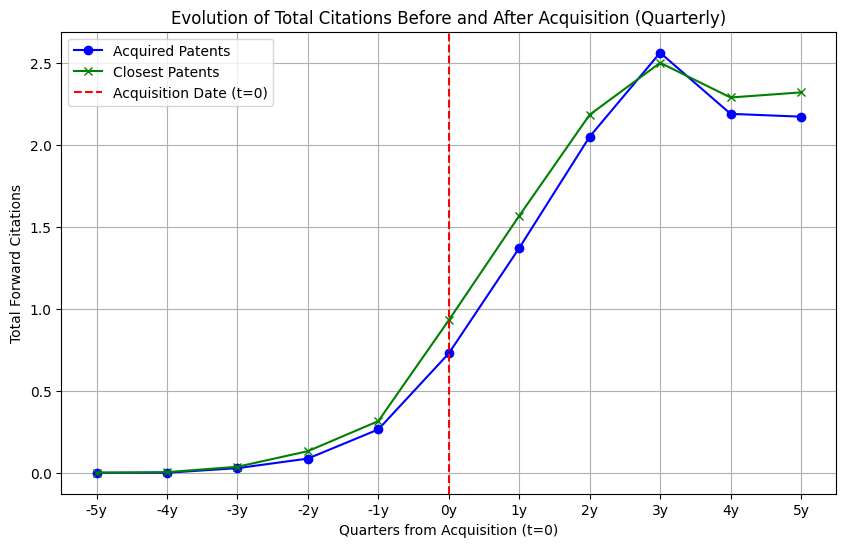

In [175]:
## Inputs
import dill as pickle

with open(r"C:\Users\amusali\Desktop\uc3m PhD\05 Analysis\01 Main\00 Python data\Drive\03 Patents with pairs (group checked)\Apple Computer Inc._1997-08-05_before.pkl", 'rb') as f:
    t = pickle.load(f)
patents = t
center_date=datetime(1997, 8, 5)
no_closest_patent_counter = 0
no_cited_patent_counter = 0
patents_with_citation = 0

upper_lower_bound = 5
implied_days = 365
# Initialize dictionaries to hold citation counts for each time point (quarters)

time_range=(-upper_lower_bound, upper_lower_bound)
patent_citations_by_time = {t: 0 for t in range(time_range[0], time_range[1] + 1)}
patent_count_by_time = {t: 0 for t in range(time_range[0], time_range[1] + 1)}
closest_citations_by_time = {t: 0 for t in range(time_range[0], time_range[1] + 1)}
closest_count_by_time =  {t: 0 for t in range(time_range[0], time_range[1] + 1)}

for patent in patents:
    if patent.forward_citations == 0 or not patent.forward_citations:
        no_cited_patent_counter += 1
        continue
    if (patent.date_application - center_date).days < - implied_days * upper_lower_bound:
        print("BEFORE THE ANALYSIS Period")
        continue
    if (patent.date_application - center_date).days > 365:
        print("Too close to the acquistion")
        continue
    if patent.closest_patent is None:
        print('None closes patent')
        no_closest_patent_counter +=1
        continue
    # Check if the patent has any citedby_patents
    if patent.citedby_patents:
        for cited_patent in patent.citedby_patents:
            #print(cited_patent.date_granted)
            # Calculate time difference (in quarters) from the center date
            t_patent = (cited_patent.date_granted - center_date).days // implied_days  # Approx. 91 days in a quarter
            #print(t_patent)
            if time_range[0] <= t_patent <= time_range[1]:
                patent_citations_by_time[t_patent] += 1  # Add 1 citation for this quarter
    time_to_acquisition = (patent.date_application - center_date).days // implied_days
    
    for key, value in patent_count_by_time.items():
        if key >= time_to_acquisition:
            patent_count_by_time[key] += 1
    # Check if the closest patent exists and has any citedby_patents
    if patent.closest_patent and patent.closest_patent.citedby_patents:
        for cited_patent in patent.closest_patent.citedby_patents:
            t_closest = (cited_patent.date_granted - center_date).days // implied_days  # Time difference in quarters
            if time_range[0] <= t_closest <= time_range[1]:
                closest_citations_by_time[t_closest] += 1 # Add 1 citation for this quarter

    time_to_acquisition = (patent.closest_patent.date_application - center_date).days // implied_days
    
    for key, value in closest_count_by_time.items():
        if key >= time_to_acquisition:
            closest_count_by_time[key] += 1

    patents_with_citation += 1

print(no_closest_patent_counter)
print(f"patents with no citation: {no_cited_patent_counter}")   
print(f"paetnts with citation : {patents_with_citation}")

print(patent_citations_by_time)
print(patent_count_by_time)
print(closest_count_by_time)

# Calculate average citations for each time point (quarter)
avg_patent_citations = [patent_citations_by_time[t]/patent_count_by_time[t] for t in range(time_range[0], time_range[1] + 1)]
avg_closest_citations = [closest_citations_by_time[t]/closest_count_by_time[t] for t in range(time_range[0], time_range[1] + 1)]




# Create the x-axis (time points in quarters)
time_points = list(range(time_range[0], time_range[1] + 1))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_points, avg_patent_citations, label='Acquired Patents', marker='o', color='blue')
plt.plot(time_points, avg_closest_citations, label='Closest Patents', marker='x', color='green')

# Highlight t=0 (acquisition date)
plt.axvline(x=0, color='red', linestyle='--', label='Acquisition Date (t=0)')

plt.title("Evolution of Total Citations Before and After Acquisition (Quarterly)")
plt.xlabel("Quarters from Acquisition (t=0)")
plt.ylabel("Total Forward Citations")
plt.xticks(np.arange(time_range[0], time_range[1] + 1), labels=[f"{i}y" for i in range(time_range[0], time_range[1] + 1)])
plt.legend()
plt.grid(True)
plt.show()





In [161]:
len(patents)

30

In [116]:
print(patent_citations_by_time)
print(patent_count_by_time)

{-20: 0, -19: 0, -18: 0, -17: 0, -16: 0, -15: 0, -14: 0, -13: 0, -12: 0, -11: 0, -10: 1, -9: 1, -8: 1, -7: 4, -6: 37, -5: 23, -4: 11, -3: 52, -2: 54, -1: 34, 0: 49, 1: 64, 2: 84, 3: 47, 4: 22, 5: 29, 6: 35, 7: 44, 8: 34, 9: 44, 10: 95, 11: 51, 12: 47, 13: 63, 14: 86, 15: 125, 16: 64, 17: 81, 18: 66, 19: 93, 20: 62}
{-20: 6, -19: 9, -18: 9, -17: 26, -16: 41, -15: 61, -14: 76, -13: 107, -12: 128, -11: 151, -10: 166, -9: 188, -8: 200, -7: 206, -6: 229, -5: 243, -4: 250, -3: 251, -2: 254, -1: 255, 0: 255, 1: 255, 2: 255, 3: 255, 4: 255, 5: 255, 6: 255, 7: 255, 8: 255, 9: 255, 10: 255, 11: 255, 12: 255, 13: 255, 14: 255, 15: 255, 16: 255, 17: 255, 18: 255, 19: 255, 20: 255}


In [ ]:
help(np.sum)

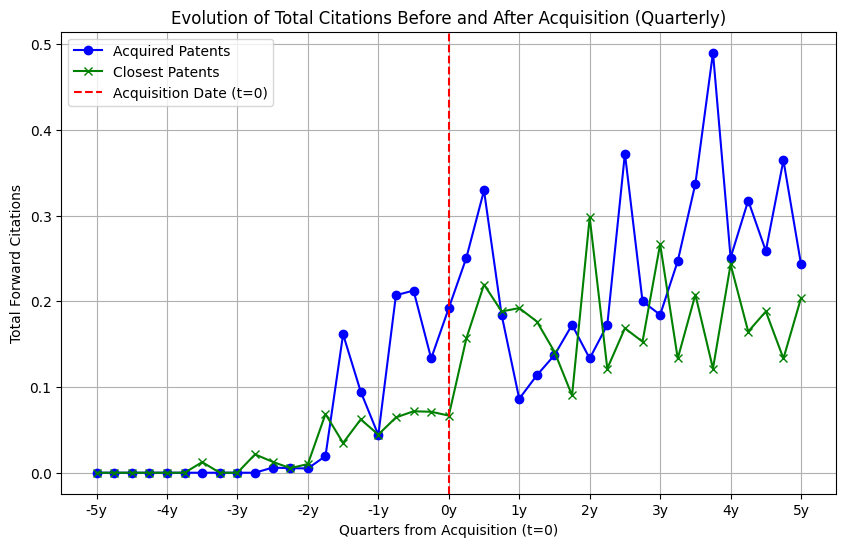

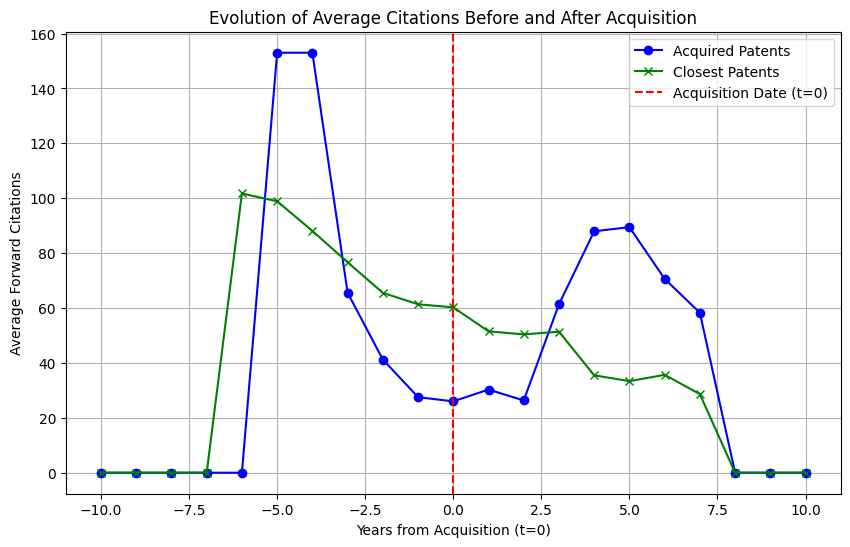

In [42]:
plot_citation_evolution(t)

In [11]:
a = pat.patent_embedding
b = pat.closest_patent.patent_embedding

In [4]:
pat = t[4]
print(pat)

Patent(patent_id='8473503', abstract='Disclosed in one example is a method for searching. In some examples, the method includes receiving an unstructured search query, parsing the unstructured search query into a plurality of structured search attributes using a search term attribute dictionary, performing a search of a structured database based upon the plurality of structured search attributes to identify a plurality of search results, populating a plurality of form fields of a search form with the plurality of structured search attributes, and displaying the search form in association with the search results.', forward_citations=15, date_application=datetime.datetime(2011, 7, 13, 0, 0), date_granted=datetime.datetime(2013, 6, 25, 0, 0), tech_field_group='inventional', tech_field_group_id='G06F', tech_field_subgroup='Information retrieval; Database structures therefor; File system structures therefor-of structured data, e.g. relational data-Querying-Query processing-with adaptation t